In [ ]:
import pandas as pd
import FinanceDataReader as fdr
import seaborn as sns
import numpy as np

fdr.__version__

df_krx = fdr.StockListing("KRX")


,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


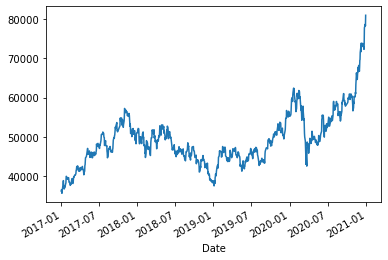

In [57]:
df = fdr.DataReader('005930', "2017", "2021")
df.head()

df["Close"].plot()
df_krx = pd.read_csv("krx.csv")
df_krx[["Symbol", "Name"]].head()

In [58]:
# 종목명으로 종목코드 받아오는 함수 만들기
# df_krx의 Name column에서 같은 값이 있으면 
# row의 Symbol column의 값을 list로 name_list에 저장하기
# item_code_by_item_name 함수를 만듭니다.

def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return False

In [60]:
item_code_by_item_name("하이브")

'352820'

In [62]:
# item_code_by_item_name : 종목명으로 종목번호 가져오기
# find_item_list : 종목번호로 해당연도 데이터 가져오기
# find_item_list는 year 값이 없으면 기본으로 2020년 데이터를 선택

def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """
    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [68]:
find_item_list("NAVER", 2017)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,155820,157621,155219,155620,30777,0.002577
2017-01-03,155618,155618,153616,153617,51766,-0.012871
2017-01-04,155220,162230,154419,162230,120359,0.056068
2017-01-05,162228,162228,158423,158424,68724,-0.023461
2017-01-06,158423,160426,157422,160026,50269,0.010112
...,...,...,...,...,...,...
2022-03-15,328500,335000,326000,327500,627012,-0.004559
2022-03-16,333500,334000,324000,330500,584708,0.009160
2022-03-17,337500,348000,337500,344500,1070200,0.042360


In [71]:
stock_daily = find_item_list("빅히트")


stock_daily.plot()

AttributeError: 'bool' object has no attribute 'plot'